
# NLP Essentials Project

# Sentiment Analysis Online Movie Reviews

### Project Scenario

In a recent [market research](https://newsroom.ibm.com/IBMs-Global-AI-Adoption-Index-2021?lnk=ushpv18ai3) by IBM, almost one-third of IT professionals surveyed globally say their business is using Artificial Intelligence (AI). The survey reported almost half of businesses today are now using applications powered by natural language processing (NLP).

NLP, specifically 'Sentiment Analysis', can provide a key business advantage by abstracting from unstructured text data the negative or positive attitude of the writer/author. This crucuial insight can help turn web data into market intelligence for the business. 

A request has been received from the web development department to add 'Sentiment Analysis' feature to a movie reviews page. 

The insights from the sentiment analysis will be used to promote more popular movies.  

In this project, you are tasked to create a prototype NLP project that is capable of 'Sentiment Analysis' from movie reviews. 

---

In this assignment, you will be working **individually** on the 'Sentiment Analysis' project. 

Complete ALL THE TASKS ( From 1 to 7). You may refer to online documentation (e.g. keras, pandas, etc) for help on syntax. 

`No copying of codes wholesale is allowed.`

Use a random_state = 42 where appropriate.

Broadly, this project will require the following steps:

1. Importing Various Modules.
1.Problem scoping.
>1.1. Defining problem statement using 4Ws (Who, What, Where, Why) problem canvas from the project scenario.

2.Data acquisition and Data exploration.
>2.1.Importing various modules.

>2.2.Preparing the data.

>>2.2.1. Preprocess Text.

>>2.2.2. Perform image pre-processing and data augmentation.

>>2.2.3.Split it into train, validate, and test datasets.

>>2.2.4. Perform Feature Extraction Using TF-IDF.

3.Modelling.

>3.1. Create the model - Build a model based on Build a model based on Neural Network.





# Part 1 : Data loading and preliminary inspection

The data for this project will be from `polarity dataset 2.0` collected by [Bo Pang and colleagues from Cornell Univeristy](http://www.cs.cornell.edu/people/pabo/movie-review-data/). 

*(This dataset will be provided to you.)*

It was used for the paper published in 2002 called Thumbs up?
Sentiment Classification using Machine Learning Techniques, by Bo Pang, Lilian Lee, and Shivakumar Vaithyanathan.


## 
### $\color{red}{\text{NOTE: IF YOU DO NOT HAVE A PERSONAL PC TO WORK ON}}$
### (If you have, skip Part 1)

The following code is given if you are going to use it on google colab.

Load the given dataset according the folder structure.


### Folder Structure
**Reminder**

In your google drive folder ensure you have the following directory structure set up:
```
Directory Structure In Google Drive:
MyDrive
|
+-- ITE
     |
     +--NLP
        |
        +--Project
          |
          +data
              |
              +--pos
              |
              +--neg
         
```            


## Task 2: Data acquisition and Data exploration.

Collect an additional 30 samples of positive reviews and 30 samples of negative reviews from this website:
https://www.rottentomatoes.com/browse/movies_in_theaters/sort:newest?page=1


Add these to the given dataset respectively. 

The final dataset should have 1000 positive reviews and 1000 negative reviews. 


In [1]:
# #@markdown { "tags": "hide-ouput" }

# import matplotlib.pyplot as plt

''' 
# Use this code if you are doing on colab  

f, ax=plt.subplots(1,2, figsize=(20,20)) 
pic_name1 = path+"ReviewsScreenCapture.jpg"
pic_name2=path+"MoviesPage.jpg"

ax[1].title.set_text("From the movie page, scroll down to see the critic reviews. \nSelect the positive or negative reviews.")
ax[1].imshow(plt.imread(pic_name1))

ax[0].title.set_text("Scroll through the movie page and select any movies.")
ax[0].imshow(plt.imread(pic_name2))
plt.axis('off')
'''

# Use this code if you are doing on your PC

# f, ax=plt.subplots(1,2, figsize=(20,20)) 
# pic_name1 = "ReviewsScreenCapture.jpg"
# pic_name2 = "MoviesPage.jpg"

# ax[1].title.set_text("From the movie page, scroll down to see the critic reviews. \nSelect the positive or negative reviews.")
# ax[1].imshow(plt.imread(pic_name1))

# ax[0].title.set_text("Scroll through the movie page and select any movies.")
# ax[0].imshow(plt.imread(pic_name2))
# plt.axis('off')

' \n# Use this code if you are doing on colab  \n\nf, ax=plt.subplots(1,2, figsize=(20,20)) \npic_name1 = path+"ReviewsScreenCapture.jpg"\npic_name2=path+"MoviesPage.jpg"\n\nax[1].title.set_text("From the movie page, scroll down to see the critic reviews. \nSelect the positive or negative reviews.")\nax[1].imshow(plt.imread(pic_name1))\n\nax[0].title.set_text("Scroll through the movie page and select any movies.")\nax[0].imshow(plt.imread(pic_name2))\nplt.axis(\'off\')\n'

## Sample Guide on how to load your data

You do not need to follow this code, use your own code if you prefer to.

In [2]:
# The following codes in this cell are provided as a guide. 

import os

def read_in(folder):
    files = os.listdir(folder)
    a_dict = {}
    for a_file in sorted(files):
        if not a_file.startswith("."):
            with open(folder + a_file, encoding='ISO-8859-1', errors ='ignore') as f:
                file_id = a_file.split(".")[0].strip()
                a_dict[file_id] = f.read()
            f.close()
    return a_dict

Print out the number of reviews in positive and negative dictionaries, as well as the very first positive and very first negative reviews in the dictionaries.

In [3]:
# The following codes in this cell are provided as a guide


# Use this folder path if doing on colab
# folder=path+'data/'

folder = 'data/'
pos_dict = read_in(folder + "pos/")
print(len(pos_dict))
print(pos_dict.get(next(iter(pos_dict))))

neg_dict = read_in(folder + "neg/")
print(len(neg_dict))
print(neg_dict.get(next(iter(neg_dict))))

1000
films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this seems almos

## Task 2.1: Importing various modules - Data Cleansing

Import the relevant NLTK libraries. 

In [4]:
# The following codes in this cell are provided as a guide

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Family\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Family\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Family\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Task 2.2: Data exploration

Use methods and ideas that you can think of to explore the data.

1. Showcase some interesting information about this data.
2. Showcase any statistics about this data that can help you in your cleaning.

$\color{cyan}{\text{Bonus marks will be award for interesting insights into the data}}$

In [5]:
# Your code here

number_positive = len(pos_dict)
number_negative = len(neg_dict)
print(f"Number of Positive: {number_positive}")
print(f"Number of Negative: {number_negative}")






Number of Positive: 1000
Number of Negative: 1000


In [6]:
'''


Some interesting write up from your exploration.
There are 1000 positive and 1000 negative reviews.

'''

'\n\n\nSome interesting write up from your exploration.\nThere are 1000 positive and 1000 negative reviews.\n\n'

### Task 2.2.1: Importing various modules - Add More Stops Words To NLTK

Add the following to stopwords:
1. 'www'
2. '.com'
3. 'http'

In [7]:
from nltk.corpus import stopwords

stop = nltk.corpus.stopwords.words('english')
# Add a few more stop words we would like to remove here
##Complete the code below##
newStopWords = ['www','.com','http']
stop.extend(newStopWords)
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Task 2.2.2 : Process Text - Tokenize, Remove Punctuation, Lemmatize 

Complete the following 3 functions.

Feel free to add additional cleaning functions and improve `process_text()` if you like to.

Feel free to change the way the functions are written as well if you like to.

In [8]:
import string
from nltk.tokenize import word_tokenize

# tokenize text using nltk.
def tokenize(text):
  ##Complete the code below##
  token = word_tokenize(text)

  return token

#remove punctuation from text using 'string.punctation'
def remove_punctuation(text):
  ##Complete the code below##
  translator = str.maketrans("", "", string.punctuation)
  no_punctuation_text = [word.translate(translator) for word in text]

  return no_punctuation_text

#lemmatize sentence using 'nltk.stem.PorterStemmer'
##Complete the code below##
def lemmatize(sentence):
    porter = nltk.stem.PorterStemmer()
    ##Complete the code below##
    lemmatize_words = [porter.stem(word) for word in sentence]

    return lemmatize_words



def process_text(text):
    tokenized_text=tokenize(text)
    no_punctuation_text=remove_punctuation(tokenized_text)
    lemmas=lemmatize(no_punctuation_text)

    processed = ' '.join([w.lower() for w in lemmas if w not in stop])
    return processed


## Task 3: Randomly Combine Review Texts From Positive & Negative Reviews Data Sets. 

Preprocessed texts to remove punctuation, remove stop words and lemmatized the text.

Combine all these texts into a single dataset where each preprocessed review and its label are in a format that is good for analysis: 

Example 1:

**A tuple format**

`data=[('preprocessed review text', label), ('preprocessed review text', label) ...]`

* ('this movie is nice', 1)
* ('this movie is lousy',0)

Example 2:

**A pandas dataframe format**
```
0	one reviewer mentioned watching oz episode you...	1
1	wonderful little production br br filming tech...	1
2	thought wonderful way spend time hot summer we...	1
3	basically there family little boy jake think t...	0
4	petter matteis love time money visually stunni...	1
```

Label for positive and negative review:
* `Positive review is given 1.`
* `Negative review is given 0.`


The following incomplete code is given as a guide as an example to load texts and labels into lists.

You can prepare your own code to load it in any format that you wish.

In [9]:
import pandas as pd
import random

positive_reviews = [(review, 1) for review in pos_dict.values()]
negative_reviews = [(review, 0) for review in neg_dict.values()]

all_reviews = positive_reviews + negative_reviews

random.seed(42)  
random.shuffle(all_reviews)
processed_reviews, labels = zip(*[(process_text(review), label) for review, label in all_reviews])

df = pd.DataFrame({'Processed Review': processed_reviews, 'Label': labels})

print(df.head())


                                    Processed Review  Label
0  central focu michael winterbottom  welcom sara...      1
1   fab 4  ronald reagan high four stuckup girl  ...      0
2  save privat ryan  dreamwork  run time  2 hour ...      1
3  must unwritten rule state  one get enlighten w...      1
4  well  go expect  movi big snake eat peopl  thi...      0


### Task 2.2.3: Split Dataset Into Train Test Sets.

Split the texts into:

1. 80% for training.
2. 20% for testing.

The following incomplete code is given as a guide as an example to split the text data from a list.

You can prepare your own code to split it in any format that you wish.

In [10]:
def split(texts, labels, proportion):
    train_data = []
    train_targets = []
    test_data = []
    test_targets = []
    ##Complete the code below##
    num_train = int(len(texts) * proportion)
    train_data = texts[:num_train]
    train_targets = labels[:num_train]
    test_data = texts[num_train:]
    test_targets = labels[num_train:]
    
    return train_data, train_targets, test_data, test_targets

train_data, train_targets, test_data, test_targets = split(processed_reviews, labels, 0.8)
        
print(len(train_data)) # 1600?
print(len(train_targets)) # 1600?      
print(len(test_data)) # 400?       
print(len(test_targets)) # 400? 
print(train_targets[:10]) # print out the targets for the first 10 training reviews 
print(test_targets[:10]) # print out the targets for the first 10 test reviews 

1600
1600
400
400
(1, 0, 1, 1, 0, 0, 0, 0, 1, 0)
(0, 1, 1, 0, 0, 1, 0, 1, 1, 1)


In [11]:
# The following codes in this cell are provided as a guide

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [12]:
# The following codes in this cell are provided as a guide

count_vect = CountVectorizer(analyzer = "word", strip_accents=None, tokenizer = None, \
                             preprocessor = None, stop_words = None, max_features = 500) 


train_data_features = count_vect.fit_transform(train_data)
test_data_features = count_vect.transform(test_data)

# Check the dimensionality 
print(train_data_features.shape)
print(test_data_features.shape)


(1600, 500)
(400, 500)


The max features for CountVectorizer function has been set to 500. The parameter can be adjusted to improve results. 

In [13]:
print(train_data_features[:11])

  (0, 270)	1
  (0, 68)	1
  (0, 101)	1
  (0, 114)	1
  (0, 64)	5
  (0, 454)	1
  (0, 121)	1
  (0, 337)	1
  (0, 347)	1
  (0, 412)	1
  (0, 469)	1
  (0, 90)	1
  (0, 452)	1
  (0, 235)	1
  (0, 138)	1
  (0, 40)	1
  (0, 306)	4
  (0, 275)	1
  (0, 215)	1
  (0, 341)	2
  (0, 359)	1
  (0, 495)	2
  (0, 153)	2
  (0, 142)	1
  (0, 338)	1
  :	:
  (10, 76)	1
  (10, 240)	1
  (10, 272)	1
  (10, 130)	1
  (10, 344)	2
  (10, 358)	1
  (10, 440)	1
  (10, 234)	1
  (10, 123)	1
  (10, 243)	1
  (10, 379)	2
  (10, 320)	1
  (10, 455)	2
  (10, 193)	1
  (10, 137)	1
  (10, 190)	1
  (10, 426)	2
  (10, 217)	1
  (10, 280)	1
  (10, 405)	1
  (10, 413)	1
  (10, 122)	1
  (10, 154)	1
  (10, 295)	1
  (10, 352)	1


In [14]:
count_vect.get_feature_names_out()[321]

'piec'

# Part 2: Perform AI Natural Language Inference

## Task 2.2.4: Feature Extraction Using TF-IDF

Perform normalization of bag of words using the TfidfTransformer. Use it the same way as above. 

Create a class, and use the .fit_transform() method with the bag of words as your argument to create your TFIDF.


In [15]:
tfidfier = TfidfTransformer()
tfidf = tfidfier.fit_transform(train_data_features)
tfidf_test = (test_data_features)

In [16]:
# The following codes in this cell are provided as a guide

import numpy as np
X_train = tfidf.toarray()
y_train = np.array(train_targets)
X_test = tfidf_test.toarray()
y_test = np.array(test_targets)

In [17]:
# The following codes in this cell are provided as a guide
# Convert a vector with integers representing different categories 
# into binary form: [0,1,0,0 ... ] 
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train-y_train.min(), dtype="int8")
y_test=to_categorical(y_test-y_test.min(),dtype="int8")

In [18]:
y_train[0]

array([0, 1], dtype=int8)

In [19]:
np.unique(y_train[:,1], return_counts=True)

(array([0, 1], dtype=int8), array([798, 802], dtype=int64))

In [20]:
y_test[-10:]

array([[0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0]], dtype=int8)

## Task 5: Create Model Using Neural Networks

Create a suitable neural network and train it. 


In [21]:
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs = 10, 
          validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/10
50/50 [==============================] - 2s 22ms/step - loss: 0.6778 - accuracy: 0.5987 - val_loss: 1.0644 - val_accuracy: 0.6325
Epoch 2/10
50/50 [==============================] - 0s 6ms/step - loss: 0.6136 - accuracy: 0.7375 - val_loss: 1.3755 - val_accuracy: 0.7250
Epoch 3/10
50/50 [==============================] - 0s 6ms/step - loss: 0.5327 - accuracy: 0.7850 - val_loss: 1.8436 - val_accuracy: 0.7475
Epoch 4/10
50/50 [==============================] - 0s 6ms/step - loss: 0.4591 - accuracy: 0.8106 - val_loss: 2.1440 - val_accuracy: 0.7925
Epoch 5/10
50/50 [==============================] - 0s 6ms/step - loss: 0.4075 - accuracy: 0.8406 - val_loss: 2.6183 - val_accuracy: 0.7750
Epoch 6/10
50/50 [==============================] - 0s 6ms/step - loss: 0.3682 - accuracy: 0.8444 - val_loss: 2.7961 - val_accuracy: 0.7850
Epoch 7/10
50/50 [==============================] - 0s 5ms/step - loss: 0.3323 - accuracy: 0.8775 - val_loss: 3.0627 - val_accuracy: 0.7900
Epoch 8/10
50/50 [=

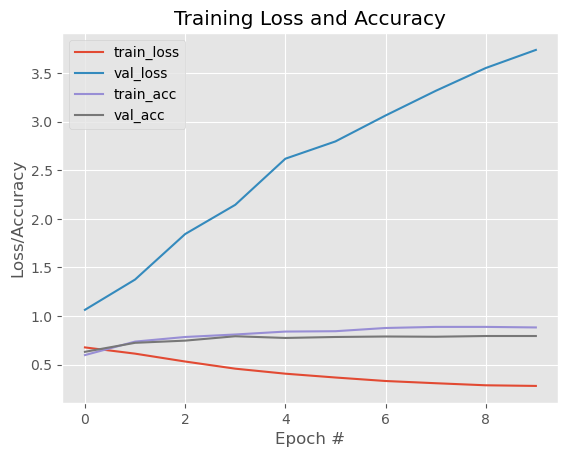

In [22]:
import matplotlib.pyplot as plt
num_epochs=10

def plot_graphs(H, metric):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #" )
  plt.ylabel("Loss/Accuracy" )
  plt.legend()
  plt.savefig("model history")
  plt.show( )
plot_graphs(history,'accuracy')

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
 
predicted = model.predict(X_test)
predicted_label=[np.argmax(each) for each in np.array(predicted)]
y_test_label=[np.argmax(each) for each in np.array(y_test)]
print("\nConfusion matrix:")
print(confusion_matrix(y_test_label, predicted_label))
print(classification_report(y_test_label, predicted_label))

13/13 [==============================] - 0s 3ms/step

Confusion matrix:
[[164  38]
 [ 44 154]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       202
           1       0.80      0.78      0.79       198

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.80      0.80      0.79       400



## Task 6: Test For Unseen Text

Use the trained model to make predictions on totally unseen text. 

In [24]:
#use the following text for prediction
neg_text="Just when you think you’ve seen the worst movie ever made,\
along comes this pile of toxic waste."

pos_text='This is going to go down as one of 2022’s most entertaining motion pictures.'


$\color{cyan}{\text{Special Note: Since we did both CountVec and TFIDF, when encoding we must take note to do it the same way}}$

In [25]:
def encode_sentence(input_text):
    encoded_text = count_vect.transform([input_text])
    encoded_text = encoded_text.toarray()
    return encoded_text

def prediction(encoded_text):
    predictions = model.predict(encoded_text)
    predicted_class = np.argmax(predictions)
    print("The predicted probability is:", predictions)
    print("The predicted class is:", predicted_class)

    if predicted_class == 0:
        print("The provided text is classified as: Negative")
    else:
        print("The provided text is classified as: Positive")


In [26]:
# Do your prediction here

negative = encode_sentence(neg_text)
prediction(negative)

positive = encode_sentence(pos_text)
prediction(positive)

1/1 [==============================] - 0s 58ms/step
The predicted probability is: [[0.99454534 0.00545467]]
The predicted class is: 0
The provided text is classified as: Negative
1/1 [==============================] - 0s 62ms/step
The predicted probability is: [[0.23449753 0.76550245]]
The predicted class is: 1
The provided text is classified as: Positive


## Task 7: Apply Cosine Similarity To Find Similar Texts

Based on the given unseen positive and negative text previously, find the top most similar sentences from the training dataset. 

Reminder: Please note that you have to use the same fitted "tfidf" model to perform feature extraction of your texts. 

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

neg_text="Just when you think you’ve seen the worst movie ever made,\
along comes this pile of toxic waste."

pos_text='This is going to go down as one of 2022’s most entertaining motion pictures.'

def findSimiarlTextModel(pos_text,neg_text,count_vect,tfidfier, model):
  for text in [pos_text,neg_text]:

    processed_NewText=process_text(text)
    
    print("\nNew Text To Predict:\n","\""+text+"\"")
    
    t=tfidfier.transform(count_vect.transform([processed_NewText]))

    text_for_prediction=t.toarray()

    originalText_numerical = tfidfier.transform(count_vect.transform(processed_reviews)).toarray()

    
    vals=cosine_similarity(text_for_prediction, originalText_numerical)

    
    print(vals, type(vals), vals.shape)
    vals=vals.reshape(-1)
    print(vals.argsort()[-1]) 
    print(vals[vals.argsort()[-1]])
    print(processed_reviews[vals.argsort()[-1]])

findSimiarlTextModel(pos_text,neg_text,count_vect,tfidfier, model)



New Text To Predict:
 "This is going to go down as one of 2022’s most entertaining motion pictures."
[[0.05449976 0.11064599 0.05817177 ... 0.05630106 0.03199308 0.01926579]] <class 'numpy.ndarray'> (1, 2000)
488
0.5350799652161181
go glorious slick hip machin  director liman  also photograph go  screenwrit august celebr drugrav scene l    prefer take  comed  snapshot troubl youth rather critiqu  nineti minut pillpop  tantric sex  car chase  attempt murder  go even ha happi end  thi sort film give member dove foundat split headach  go wound  anticip antipillpoppingcasualtantricsexcarchaseattemptedmurd sermon  blessedli  nt arriv  la tarantino pulp fiction  go compris three separ relat stori  basic follow  ronna  polley  bitter groceri store clerk face evict turn drug deal extra dough  cowork  simon  improb name askew   clubber britain ecstat hi first trip vega  zack  mohr  adam  wolf  soap opera star escap careerthreaten convict assist peculiar cop  fichtner  drug bust  perhap becaus 

---

**End of Project**

---